In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval

In [2]:
X = pd.read_csv('data_wrangling.csv', usecols=['reviewClean_sw'], squeeze=True,\
                converters={'reviewClean_sw': literal_eval}).values
y = pd.read_csv('data_wrangling.csv', usecols=['sentiment'], squeeze=True).values

In [3]:
import matplotlib.pyplot as plt

def pie_chart(array):    
    # Declare a figure with a custom size
    fig = plt.figure(figsize=(5, 5))

    # Sizes for each slide
    sizes = []
    for i, sentiment in enumerate(np.unique(array)):
        sizes.append(np.unique(array, return_counts=True)[1][i])

    # Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
    plt.pie(sizes, labels=np.unique(array), \
            autopct=lambda pct: '{:.2f}%\n({:d} reviews)'.format(pct, int(pct/100*len(array))), startangle=90)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')  
    
    plt.title('Review Sentiment Distribution')
    plt.show()

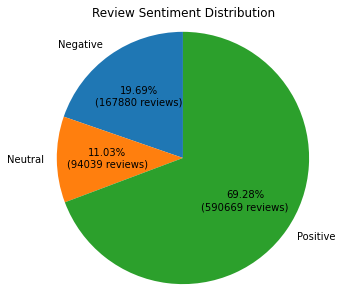

In [4]:
pie_chart(y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [6]:
from sklearn.preprocessing import LabelEncoder

# encode text sentiment labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

<h2>Feature Engineering</h2>

**Convert list of tokens to strings for BOW and tfidf embedding**

In [7]:
def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(org_list)

In [8]:
X_train = [convert_list_to_string(tokens) for tokens in X_train]
X_test = [convert_list_to_string(tokens) for tokens in X_test]

**BOW - Unigram**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=False)
X_train_bow = cv.fit_transform(X_train)
X_test_bow = cv.transform(X_test)

**BOW - Unigram & Bigram**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,2), lowercase=False)
X_train_ngbow = cv.fit_transform(X_train)
X_test_ngbow = cv.transform(X_test)

**TF-IDF - Unigram**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**TF-IDF - Unigram & Bigram**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), lowercase=False)
X_train_ngtfidf = tfidf.fit_transform(X_train)
X_test_ngtfidf = tfidf.transform(X_test)

# center tfidf by substracting the mean for each term
# X_train_ngtfidf = X_train_ngtfidf - X_train_ngtfidf.mean(axis=0)
# X_test_ngtfidf = X_test_ngtfidf - X_test_ngtfidf.mean(axis=0)

**Oversampling for Imbalanced Dataset**

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_sample(X_train, y_train)

In [ ]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42, n_jobs=-1)
# X_train, y_train = sm.fit_resample(X_train, y_train)

**Class Weights for Imbalanced Dataset**

In [ ]:
# import numpy as np
# from sklearn.utils import class_weight

# # calculate class weight
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# class_weight_dict = dict(enumerate(class_weights))
# class_weight_dict

In [ ]:
# class_weight_dict = {0: 1, 1: 10, 2: 0.1}

<h2>Model Training</h2>

<h3>Logistic Regression</h3>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

**N-Gram BOW**

In [14]:
lr_bow = LogisticRegression(max_iter=1000, n_jobs=-1)
lr_bow.fit(X_train_ngbow, y_train)

y_pred = lr_bow.predict(X_test_ngbow)

print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('\nBalanced Accuracy Score: {}\n'.format(balanced_accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.848191979732345

Balanced Accuracy Score: 0.6857525922501595

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     33576
           1       0.43      0.30      0.36     18808
           2       0.91      0.95      0.93    118134

    accuracy                           0.85    170518
   macro avg       0.71      0.69      0.69    170518
weighted avg       0.83      0.85      0.84    170518



**N-Gram TFIDF**

In [14]:
import time

lr_tfidf = LogisticRegression(max_iter=1000, n_jobs=-1)
lr_tfidf.fit(X_train_ngtfidf, y_train)

start_time = time.time()
y_pred = lr_tfidf.predict(X_test_ngtfidf)
print("--- Predict time %s seconds ---" % (time.time() - start_time))

print('\nAccuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('\nBalanced Accuracy Score: {}\n'.format(balanced_accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

--- Predict time 0.12502837181091309 seconds ---

Accuracy Score: 0.8563963921697416

Balanced Accuracy Score: 0.6824411499979511

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     33576
           1       0.49      0.26      0.34     18808
           2       0.91      0.96      0.93    118134

    accuracy                           0.86    170518
   macro avg       0.73      0.68      0.69    170518
weighted avg       0.84      0.86      0.84    170518



In [16]:
import pickle

# saving the model
with open('logistic regression model', 'wb') as file:
    pickle.dump(lr_tfidf, file)

<h3>Multinomial Naive Bayes</h3>

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

**N-Gram BOW**

In [18]:
mnb_bow = MultinomialNB()
mnb_bow.fit(X_train_ngbow, y_train)

y_pred = mnb_bow.predict(X_test_ngbow)

print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('\nBalanced Accuracy Score: {}\n'.format(balanced_accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8414595526571975

Balanced Accuracy Score: 0.6631825172957818

              precision    recall  f1-score   support

           0       0.76      0.81      0.78     33576
           1       0.45      0.24      0.31     18808
           2       0.90      0.95      0.92    118134

    accuracy                           0.84    170518
   macro avg       0.70      0.66      0.67    170518
weighted avg       0.82      0.84      0.83    170518



**N-Gram TFIDF**

In [19]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_ngtfidf, y_train)

y_pred = mnb_tfidf.predict(X_test_ngtfidf)

print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('\nBalanced Accuracy Score: {}\n'.format(balanced_accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7660071077540201

Balanced Accuracy Score: 0.45908358956021816

              precision    recall  f1-score   support

           0       0.90      0.38      0.53     33576
           1       0.58      0.00      0.00     18808
           2       0.75      1.00      0.86    118134

    accuracy                           0.77    170518
   macro avg       0.74      0.46      0.46    170518
weighted avg       0.76      0.77      0.70    170518



<h3>Random Forest</h3>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

**N-Gram BOW**

In [21]:
rf_bow = RandomForestClassifier(n_jobs=8, warm_start=True)
rf_bow.fit(X_train_ngbow, y_train)

y_pred = rf_bow.predict(X_test_ngbow)

print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('\nBalanced Accuracy Score: {}\n'.format(balanced_accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.824141732837589

Balanced Accuracy Score: 0.5801293385872962

              precision    recall  f1-score   support

           0       0.79      0.70      0.74     33576
           1       0.47      0.06      0.11     18808
           2       0.84      0.98      0.90    118134

    accuracy                           0.82    170518
   macro avg       0.70      0.58      0.58    170518
weighted avg       0.79      0.82      0.78    170518



**N-Gram TFIDF**

In [25]:
rf_tfidf = RandomForestClassifier(n_jobs=8, verbose=2, warm_start=True)
rf_tfidf.fit(X_train_ngtfidf, y_train)

y_pred = rf_tfidf.predict(X_test_ngtfidf)

print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('\nBalanced Accuracy Score: {}\n'.format(balanced_accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100building tree 7 of 100building tree 8 of 100


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 87.0min


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 268.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   12.9s finished


Accuracy Score: 0.8226638829918249

Balanced Accuracy Score: 0.5747261931396508

              precision    recall  f1-score   support

           0       0.80      0.69      0.74     33576
           1       0.48      0.05      0.09     18808
           2       0.83      0.98      0.90    118134

    accuracy                           0.82    170518
   macro avg       0.70      0.57      0.58    170518
weighted avg       0.79      0.82      0.78    170518



<h2>Model Evaluation</h2>

We also trained LSTM models and transformer models on Google Colab, and below is the summary of the model performance comparison.

In [30]:
import pandas as pd

models = ['Logistic Regression', 'Logistic Regression',\
          'Multinomial Naive Bayes', 'Multinomial Naive Bayes',\
          'Random Forest', 'Random Forest',\
          'LSTM', 'Bi-LSTM', 'Bi-LSTM + Attention', 'Transformer']

evaluation = pd.DataFrame(index=models)
evaluation.index.names = ['Model']

evaluation['Feature'] = ['BOW', 'TF-IDF', 'BOW', 'TF-IDF', 'BOW', 'TF-IDF',\
                         'Word2Vec', 'Word2Vec', 'Word2Vec', 'Built-in']
evaluation.set_index('Feature', append=True, inplace=True)

evaluation['Accuracy'] = ['0.85', '0.86', '0.84', '0.77', '0.82', '0.82', '0.82', '0.83', '0.83', '0.87']
evaluation['F1'] = ['0.84', '0.84', '0.83', '0.70', '0.78', '0.78', '0.80', '0.81', '0.81', '0.87']
evaluation['F1 Positive'] = ['0.93', '0.93', '0.92', '0.86', '0.90', '0.90', '0.91', '0.91', '0.91', '0.95']
evaluation['F1 Neutral'] = ['0.36', '0.34', '0.31', '0.00', '0.11', '0.09', '0.23', '0.27', '0.30', '0.42']
evaluation['F1 Negative'] = ['0.79', '0.80', '0.78', '0.53', '0.74', '0.74', '0.73', '0.73', '0.74', '0.82']
evaluation['Predict Time (seconds)'] = ['', '0.125', '', '', '', '', '', '', '', '512.725']

evaluation

Accuracy    F1 F1 Positive F1 Neutral  \
Model                   Feature                                          
Logistic Regression     BOW          0.85  0.84        0.93       0.36   
                        TF-IDF       0.86  0.84        0.93       0.34   
Multinomial Naive Bayes BOW          0.84  0.83        0.92       0.31   
                        TF-IDF       0.77  0.70        0.86       0.00   
Random Forest           BOW          0.82  0.78        0.90       0.11   
                        TF-IDF       0.82  0.78        0.90       0.09   
LSTM                    Word2Vec     0.82  0.80        0.91       0.23   
Bi-LSTM                 Word2Vec     0.83  0.81        0.91       0.27   
Bi-LSTM + Attention     Word2Vec     0.83  0.81        0.91       0.30   
Transformer             Built-in     0.87  0.87        0.95       0.42   

                                 F1 Negative Predict Time (seconds)  
Model                   Feature                                      
Logistic Regression     BOW             0.79                         
                        TF-IDF          0.80                  0.125  
Multinomial Naive Bayes BOW             0.78                         
                        TF-IDF          0.53                         
Random Forest           BOW             0.74                         
                        TF-IDF          0.74                         
LSTM                    Word2Vec        0.73                         
Bi-LSTM                 Word2Vec        0.73                         
Bi-LSTM + Attention     Word2Vec        0.74                         
Transformer             Built-in        0.82                512.725

In [33]:
def highlight_row(x):
    if x['Predict Time (seconds)'] != '':
        return ['background-color: yellow']*6
    else:
        return ['background-color: transparent']*6
    
evaluation.style.apply(highlight_row, axis=1)